In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('marketing_campaign.csv', sep='\t')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
# Preview dataset
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  C

In [30]:
# 1. CHECK & HANDLE MISSING VALUES
print("\nMissing Values per column:")
print(df.isnull().sum())


Missing Values per column:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [25]:
# Drop rows with too many nulls (e.g., Income)
df = df.dropna(subset=['Income'])

In [31]:
# 2. REMOVE DUPLICATES
print("\nDuplicate Before Remove", df.duplicated().sum())
df = df.drop_duplicates()
print("\nDuplicate After Remove", df.duplicated().sum())


Duplicate Before Remove 0

Duplicate After Remove 0


In [33]:
# 3. STANDARDIZE TEXT VALUES
# Clean Gender column
# df['Gender'] = df['Gender'].str.strip().str.capitalize()

# Standardize Marital_Status and Education
df['Marital_Status'] = df['Marital_Status'].str.strip().str.title()
df['Education'] = df['Education'].str.strip().str.title()

In [40]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [41]:
print(df['Dt_Customer'].unique()[:10])  # Preview first 10 unique values


['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014']


In [43]:
# 4. FIX DATE FORMAT
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

In [44]:
print(df['Dt_Customer'].unique()[:10])  # Preview after changing datatype first 10 unique values

<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00']
Length: 10, dtype: datetime64[ns]


In [46]:
# 5. CLEAN COLUMN NAMES
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [47]:
print(df.columns.tolist()) #After cleaning Columns

['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']


In [48]:
# 6. CONVERT DATA TYPES
# Age is derived, but customer birth year is present

df['age'] = 2025 - df['year_birth'] # Assuming current year is 2025
df['income'] = df['income'].astype(float)

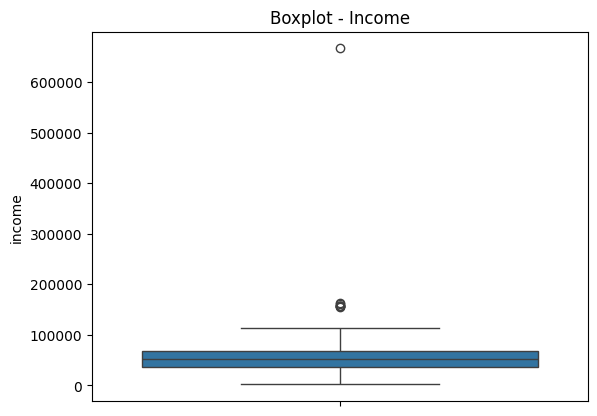

In [51]:
# 7. OUTLIER TREATMENT
# Outliers in income

sns.boxplot(df['income'])
plt.title("Boxplot - Income")
plt.show()



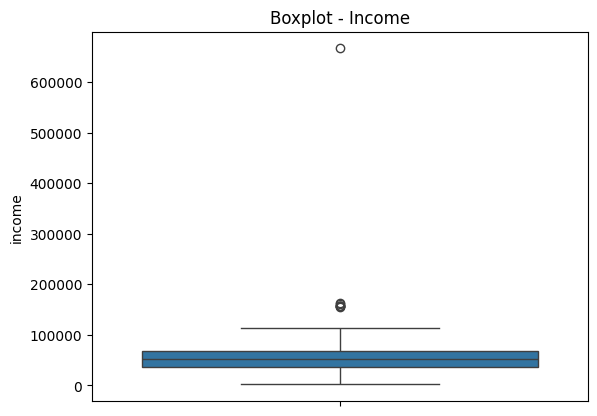

In [52]:
# 7. OUTLIER TREATMENT
# Outliers in income

sns.boxplot(df['income'])
plt.title("Boxplot - Income")
plt.show()

# Remove income outliers above 99 percentile
upper_limit = df['income'].quantile(0.99)
df = df[df['income'] < upper_limit]

In [53]:
# 8. FINAL CHECKS

print("\nFinal shape:", df.shape)
print("\nCleaned data sample:")
print(df.head())


Final shape: (2193, 30)

Cleaned data sample:
     id  year_birth   education marital_status   income  kidhome  teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         Phd        Married  58293.0        1         0   

  dt_customer  recency  mntwines  ...  acceptedcmp3  acceptedcmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   acceptedcmp5  acceptedcmp1  acceptedcmp2  complain  z_costcontact 

In [54]:
# Save cleaned dataset

df.to_csv("cleaned_marketing_campaign.csv", index=False)